In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Cette partie est pour les clients morales

In [2]:
mc_data = pd.read_csv('../cleaned-data/production/final-mc-data.csv', encoding='iso-8859-1', sep='\t')

In [3]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979146 entries, 0 to 2979145
Data columns (total 41 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   COMAX       object 
 2   CTPE        int64  
 3   CORELB      int64  
 4   PCA-1       float64
 5   PCA-2       float64
 6   PCA-3       float64
 7   PCA-4       float64
 8   PCA-5       float64
 9   PCA-6       float64
 10  PCA-7       float64
 11  PCA-8       float64
 12  PCA-9       float64
 13  PCA-10      float64
 14  PCA-11      float64
 15  PCA-12      float64
 16  PCA-13      float64
 17  PCA-14      float64
 18  PCA-15      float64
 19  PCA-16      float64
 20  PCA-17      float64
 21  PCA-18      float64
 22  PCA-19      float64
 23  PCA-20      float64
 24  PCA-21      float64
 25  PCA-22      float64
 26  PCA-23      float64
 27  PCA-24      float64
 28  PCA-25      float64
 29  PCA-26      float64
 30  PCA-27      float64
 31  PCA-28      float64
 32  PCA-29      float64
 33  PCA-30 

In [4]:
list(mc_data.columns)[2:]

['CTPE',
 'CORELB',
 'PCA-1',
 'PCA-2',
 'PCA-3',
 'PCA-4',
 'PCA-5',
 'PCA-6',
 'PCA-7',
 'PCA-8',
 'PCA-9',
 'PCA-10',
 'PCA-11',
 'PCA-12',
 'PCA-13',
 'PCA-14',
 'PCA-15',
 'PCA-16',
 'PCA-17',
 'PCA-18',
 'PCA-19',
 'PCA-20',
 'PCA-21',
 'PCA-22',
 'PCA-23',
 'PCA-24',
 'PCA-25',
 'PCA-26',
 'PCA-27',
 'PCA-28',
 'PCA-29',
 'PCA-30',
 'PCA-31',
 'PCA-32',
 'PCA-33',
 'PCA-34',
 'PCA-35',
 'PCA-36',
 'PCA-37']

In [4]:
WCSS = list()
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    
    # WCSS: Within Cluster Sum of Squares
    kmeans.fit(mc_data[list(mc_data.columns)[2:]])
    WCSS.append(kmeans.inertia_)
    
    print(clusters)

1
2
3
4
5
6
7
8
9
10


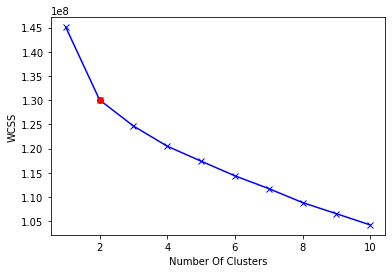

In [6]:
plt.plot(range(1, 11), WCSS, 'bx-')
plt.plot([2], WCSS[1], 'ro')  # c='r', marker='o'
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
# Elbow Method For Optimal k
plt.savefig('../graphs/wcss-moral.svg')

### As we can see here, the value of cluster 2 is the elbow point, therefore the number of clusters is 2.

In [7]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(mc_data[list(mc_data.columns)[2:]])

KMeans(n_clusters=2)

In [8]:
# The clusters centers
kmeans.cluster_centers_

array([[ 1.05088062e+00,  1.43676419e+00, -8.05361349e-01,
         3.67298666e-01, -1.57098452e-01, -9.81302239e-03,
        -1.40536628e-02, -6.10099923e-02, -1.46195464e-01,
        -1.20839821e-01,  1.17394727e-01, -4.23096454e-02,
         8.15507758e-04, -4.95363892e-02,  2.66493083e-02,
         1.53634412e-01, -3.00356473e-03,  2.36898355e-02,
        -1.64521358e-03,  8.24409460e-03,  4.88072677e-02,
        -2.55784157e-02,  3.19667429e-02,  3.49255992e-03,
        -3.79092299e-02,  5.86205165e-02, -1.93450946e-02,
        -2.10556360e-02,  3.82908462e-02,  1.61316069e-02,
        -1.68849027e-02, -1.48316964e-02, -2.02040763e-02,
         9.42258617e-03,  3.11324452e-02,  2.44971627e-02,
         1.82815343e-02,  3.68207550e-02,  5.56776206e-04],
       [ 1.09091890e+00,  1.15296970e+00,  4.08708099e+00,
         1.98694569e-01,  3.61691671e-01,  2.69647123e-01,
        -1.30893568e-01, -1.02109401e-01, -5.46303733e-02,
         2.91124346e-02, -7.15622890e-02, -1.43948401e-

In [9]:
mc_data['Cluster'] = kmeans.labels_

In [ ]:
mc_data.head()

In [ ]:
mc_data.columns[1:]

In [ ]:
mc_data[mc_data.columns[1:]].to_csv('../cleaned-data/mc-clusters.csv', sep='\t')

In [ ]:
mc_data['Cluster'].value_counts()

# Cette partie est pour les client physiques

In [10]:
pc_data = pd.read_csv('../cleaned-data/production/final-pc-data.csv', encoding='iso-8859-1', sep='\t')

In [11]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627710 entries, 0 to 627709
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  627710 non-null  int64  
 1   COMAX       627710 non-null  object 
 2   AGE         627710 non-null  int64  
 3   COSEXE      627710 non-null  int64  
 4   CTSCPI      627710 non-null  int64  
 5   PCA-1       627710 non-null  float64
 6   PCA-2       627710 non-null  float64
 7   PCA-3       627710 non-null  float64
 8   PCA-4       627710 non-null  float64
 9   PCA-5       627710 non-null  float64
 10  PCA-6       627710 non-null  float64
 11  PCA-7       627710 non-null  float64
 12  PCA-8       627710 non-null  float64
 13  PCA-9       627710 non-null  float64
 14  PCA-10      627710 non-null  float64
 15  PCA-11      627710 non-null  float64
 16  PCA-12      627710 non-null  float64
 17  PCA-13      627710 non-null  float64
 18  PCA-14      627710 non-null  float64
 19  PC

In [12]:
list(pc_data.columns)[2:]

['AGE',
 'COSEXE',
 'CTSCPI',
 'PCA-1',
 'PCA-2',
 'PCA-3',
 'PCA-4',
 'PCA-5',
 'PCA-6',
 'PCA-7',
 'PCA-8',
 'PCA-9',
 'PCA-10',
 'PCA-11',
 'PCA-12',
 'PCA-13',
 'PCA-14',
 'PCA-15',
 'PCA-16',
 'PCA-17',
 'PCA-18',
 'PCA-19',
 'PCA-20',
 'PCA-21',
 'PCA-22',
 'PCA-23',
 'PCA-24',
 'PCA-25',
 'PCA-26',
 'PCA-27',
 'PCA-28',
 'PCA-29',
 'PCA-30',
 'PCA-31',
 'PCA-32',
 'PCA-33',
 'PCA-34',
 'PCA-35',
 'PCA-36',
 'PCA-37']

In [13]:
WCSS = list()
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    
    # WCSS: Within Cluster Sum of Squares
    kmeans.fit(pc_data[list(pc_data.columns)[2:]])
    WCSS.append(kmeans.inertia_)
    
    print(clusters)

1
2
3
4
5
6
7
8
9
10


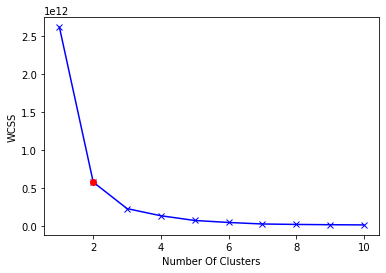

In [14]:
plt.plot(range(1, 11), WCSS, 'bx-')
plt.plot([2], WCSS[1], 'ro')  # c='r', marker='o'
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.savefig('../graphs/wcss-physique.svg')

### As we can see here, the value of cluster 2 is the elbow point, therefore the number of clusters is 2.

In [39]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(pc_data[list(pc_data.columns)[2:]])

KMeans(n_clusters=2)

In [40]:
# The clusters centers
kmeans.cluster_centers_

array([[ 4.83224342e+01,  4.89243541e-01,  7.90041645e+03,
        -5.84584719e-01, -1.30365295e-01, -1.81131312e-01,
        -2.27720632e-02, -2.66039817e-03,  1.74779854e-01,
         1.19778036e-01, -1.81730110e-02, -3.51219764e-02,
        -4.26655753e-02, -6.09481678e-02,  6.23450050e-02,
        -5.03035413e-03, -4.09634731e-02,  9.92232100e-03,
         3.42771658e-02,  5.38131609e-02,  1.55614547e-04,
        -1.55330335e-02,  4.84524782e-02, -2.08408907e-03,
        -7.56351949e-03,  1.95681678e-02,  3.40820668e-03,
        -1.15522507e-02,  2.29051334e-03, -7.91402192e-03,
        -6.03691237e-03, -3.59424950e-02, -2.70969833e-02,
        -1.33762559e-03,  2.28762054e-02, -1.20615914e-02,
         5.59745850e-03, -3.11674221e-03,  8.42642614e-03,
         3.43472340e-04],
       [ 4.66171377e+01,  5.03851628e-01,  4.24745936e+03,
         8.65879679e-01,  1.90848381e-01,  2.40229162e-01,
         2.00870397e-02,  9.08461011e-03, -2.28566687e-01,
        -1.65991145e-01,  1.92

In [41]:
pc_data['Cluster'] = kmeans.labels_

In [42]:
pc_data.head()

,Unnamed: 0,COMAX,AGE,COSEXE,CTSCPI,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,...,PCA-29,PCA-30,PCA-31,PCA-32,PCA-33,PCA-34,PCA-35,PCA-36,PCA-37,Cluster
0,0,6e3a2b9fa1,55,1,4600,-0.646623,-0.036604,2.217052,1.189677,-4.046703,...,-1.054477,0.082188,-0.801875,0.339208,-0.071603,0.864257,0.379414,-0.140253,-0.009858,1
1,1,1b44a67f61,41,0,4700,0.125416,1.073165,0.868038,-0.562101,-1.432925,...,-0.859818,0.367623,-0.055811,0.160076,0.196749,-0.514201,0.016502,-0.028747,-0.000648,1
2,4,bdf1f63a98,32,1,3500,0.348781,1.062793,1.610536,2.872877,1.810966,...,-0.215323,-0.080807,-0.432228,0.395973,0.524581,-0.378137,0.317089,0.171683,0.004463,1
3,6,bc9f2a4a5c,23,1,8400,0.392665,1.259812,-0.214781,0.013254,0.447652,...,1.271328,-0.727147,-0.957508,0.169303,0.410911,-0.246126,0.247796,-1.030909,-0.000723,0
4,8,deb8a278df,13,0,8400,-2.550140,-0.080349,0.070126,0.620882,-0.472329,...,-0.378938,0.120383,-0.135912,0.008983,-0.119032,-0.035045,-0.217251,0.098249,0.001169,0


In [43]:
pc_data.columns[1:]

Index(['COMAX', 'AGE', 'COSEXE', 'CTSCPI', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4',
       'PCA-5', 'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10', 'PCA-11',
       'PCA-12', 'PCA-13', 'PCA-14', 'PCA-15', 'PCA-16', 'PCA-17', 'PCA-18',
       'PCA-19', 'PCA-20', 'PCA-21', 'PCA-22', 'PCA-23', 'PCA-24', 'PCA-25',
       'PCA-26', 'PCA-27', 'PCA-28', 'PCA-29', 'PCA-30', 'PCA-31', 'PCA-32',
       'PCA-33', 'PCA-34', 'PCA-35', 'PCA-36', 'PCA-37', 'Cluster'],
      dtype='object')

In [44]:
pc_data[pc_data.columns[1:]].to_csv('../cleaned-data/pc-clusters.csv', sep='\t')

In [45]:
pc_data['Cluster'].value_counts()

0    362108
1    265602
Name: Cluster, dtype: int64